In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df_le = pd.read_csv('covariance_features_left_eye_v2.csv', index_col=0)
df_re = pd.read_csv('covariance_features_right_eye_v2.csv', index_col=0)
df_nt = pd.read_csv('covariance_features_nose_tip_v2.csv', index_col=0)

In [3]:
df_le

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,36.062347,1.0,-101.317894,0.920264,0.319981,0.600284,0.053895,...,0.381120,445.262299,1.0,-2377.278564,0.943242,0.403855,0.539388,0.037405,0.056757,0.331500
1,bs000_PR_SD_0.pcd,SD,PR,40.257923,1.0,-114.833755,0.908905,0.588236,0.320670,0.051454,...,0.068332,412.261292,1.0,-2153.698730,0.942233,0.613210,0.329022,0.033416,0.057767,0.058866
2,bs000_LFAU_15_0.pcd,15,LFAU,36.221920,1.0,-98.865532,0.896532,0.761360,0.135172,0.052567,...,0.067855,409.573883,1.0,-2133.431641,0.933933,0.568028,0.365906,0.038859,0.066067,0.043792
3,bs000_O_GLASSES_0.pcd,GLASSES,O,40.550774,1.0,-114.919006,0.888258,0.761890,0.126368,0.056283,...,0.076982,429.876251,1.0,-2260.915771,0.938708,0.625586,0.313122,0.035061,0.061292,0.050543
4,bs000_UFAU_44_0.pcd,44,UFAU,43.638218,1.0,-129.124741,0.933253,0.787089,0.146165,0.034753,...,0.068653,433.804260,1.0,-2280.005859,0.930669,0.638279,0.292390,0.039017,0.069331,0.042453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,45.260921,1.0,-136.854736,0.953111,0.824160,0.128952,0.024448,...,0.091546,434.404724,1.0,-2285.055908,0.932837,0.640569,0.292268,0.037840,0.067163,0.064082
4662,bs104_YR_R45_0.pcd,R45,YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,47.206203,1.0,-144.472565,0.949408,0.855676,0.093732,0.025854,...,0.074054,429.422119,1.0,-2255.883545,0.937450,0.680662,0.256789,0.034639,0.062550,0.056242
4664,bs104_PR_U_0.pcd,U,PR,45.980553,1.0,-139.955307,0.955693,0.785656,0.170037,0.023640,...,0.114770,429.677094,1.0,-2257.811035,0.937751,0.673303,0.264449,0.034625,0.062249,0.085153


In [4]:
df_re

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,34.481819,1.0,-94.353477,0.929584,0.499189,0.430395,0.042936,...,0.011067,372.234741,1.0,-1895.174072,0.922530,0.642008,0.280522,0.043112,0.077470,0.012038
1,bs000_PR_SD_0.pcd,SD,PR,36.538013,1.0,-99.908806,0.886836,0.514971,0.371866,0.064988,...,0.088511,409.226807,1.0,-2125.318604,0.921769,0.535330,0.386439,0.046242,0.078231,0.056806
2,bs000_LFAU_15_0.pcd,15,LFAU,44.641808,1.0,-130.688965,0.885949,0.748903,0.137046,0.057689,...,0.085963,441.056580,1.0,-2308.972168,0.898634,0.566618,0.332016,0.057290,0.101366,0.048933
3,bs000_O_GLASSES_0.pcd,GLASSES,O,45.883480,1.0,-134.346573,0.857039,0.721168,0.135871,0.071228,...,0.074571,444.294373,1.0,-2336.041260,0.915291,0.670767,0.244523,0.046033,0.084709,0.047598
4,bs000_UFAU_44_0.pcd,44,UFAU,41.321648,1.0,-119.913467,0.931032,0.722523,0.208510,0.037070,...,0.072324,424.058807,1.0,-2215.384521,0.921994,0.589629,0.332365,0.044686,0.078006,0.044605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,43.889996,1.0,-131.526993,0.955589,0.826125,0.129464,0.023192,...,0.083322,422.042877,1.0,-2213.432129,0.941888,0.645406,0.296482,0.032988,0.058112,0.070180
4662,bs104_YR_R45_0.pcd,R45,YR,41.308975,1.0,-121.233940,0.952753,0.697188,0.255565,0.026370,...,0.116418,396.505005,1.0,-2056.414551,0.947915,0.846081,0.101833,0.026707,0.052085,0.100655
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,46.022224,1.0,-139.170883,0.941866,0.818028,0.123838,0.030054,...,0.092350,431.800354,1.0,-2272.777100,0.939058,0.639259,0.299799,0.034604,0.060942,0.072421
4664,bs104_PR_U_0.pcd,U,PR,47.483337,1.0,-145.772705,0.951395,0.747388,0.204008,0.026350,...,0.115979,434.115234,1.0,-2286.691162,0.939181,0.665091,0.274090,0.034039,0.060819,0.091076


In [5]:
df_nt

,cloud,expression,type,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,RD,CR,39.612831,1.0,-113.233162,0.930281,0.807176,0.123105,0.035816,...,0.014179,251.114471,1.0,-1154.587891,0.765857,0.182155,0.583702,0.141867,0.234143,0.024981
1,bs000_PR_SD_0.pcd,SD,PR,43.013111,1.0,-126.593880,0.931653,0.840711,0.090943,0.034564,...,0.018735,271.958862,1.0,-1256.047852,0.668412,0.130081,0.538331,0.184908,0.331588,0.029849
2,bs000_LFAU_15_0.pcd,15,LFAU,44.262203,1.0,-132.053665,0.940795,0.803262,0.137533,0.030809,...,0.011649,274.157104,1.0,-1269.098633,0.659558,0.094547,0.565011,0.191752,0.340442,0.025223
3,bs000_O_GLASSES_0.pcd,GLASSES,O,42.210541,1.0,-122.814705,0.918337,0.880037,0.038300,0.039965,...,0.007873,269.660400,1.0,-1247.277344,0.688240,0.117953,0.570288,0.179021,0.311760,0.020142
4,bs000_UFAU_44_0.pcd,44,UFAU,42.355164,1.0,-123.678505,0.924433,0.880251,0.044182,0.037200,...,0.003972,268.620850,1.0,-1236.770752,0.667460,0.137309,0.530151,0.184500,0.332540,0.032410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,34,LFAU,42.306458,1.0,-123.694427,0.929373,0.843179,0.086194,0.035591,...,0.033342,297.665680,1.0,-1424.952393,0.777287,0.154493,0.622794,0.139203,0.222713,0.020534
4662,bs104_YR_R45_0.pcd,R45,YR,36.574482,1.0,-104.968498,0.956392,0.394339,0.562053,0.029434,...,0.000964,220.258423,1.0,-1001.297180,0.851462,0.227625,0.623837,0.097421,0.148538,0.003737
4663,bs104_LFAU_12R_0.pcd,12R,LFAU,42.126892,1.0,-122.476120,0.918158,0.878130,0.040028,0.040083,...,0.029535,266.999847,1.0,-1232.966675,0.709557,0.171077,0.538479,0.165782,0.290443,0.054350
4664,bs104_PR_U_0.pcd,U,PR,41.012726,1.0,-117.781166,0.910067,0.882667,0.027400,0.043603,...,0.004970,265.378845,1.0,-1232.987671,0.753638,0.168432,0.585206,0.148308,0.246362,0.006188


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: - Σi=1->3 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [2]:
# global variables
nfeatures = 9
columns = list(df_le.columns[3:])
features = ['Somatório', 'Omnivariância', 'Autoentropia',
            'Anisotropia', 'Planaridade', 'Linearidade',
            'Variação de Superfície', 'Esfericidade', 'Verticalidade']
colors = ['blue', 'cyan', 'green', 'red', 'brown']
labels = ['Raio 10', 'Raio 15', 'Raio 20', 'Raio 25', 'Raio 30']

NameError: name 'df_le' is not defined

In [7]:
def plot_histograms(df,  point_name, radius=10, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_r_{radius}', f'gf02_r_{radius}', f'gf03_r_{radius}',
            f'gf04_r_{radius}', f'gf05_r_{radius}', f'gf06_r_{radius}',
            f'gf07_r_{radius}', f'gf08_r_{radius}', f'gf09_r_{radius}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    title = f'Histogramas - {point_name} - Raio: {radius} {expression}'
    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

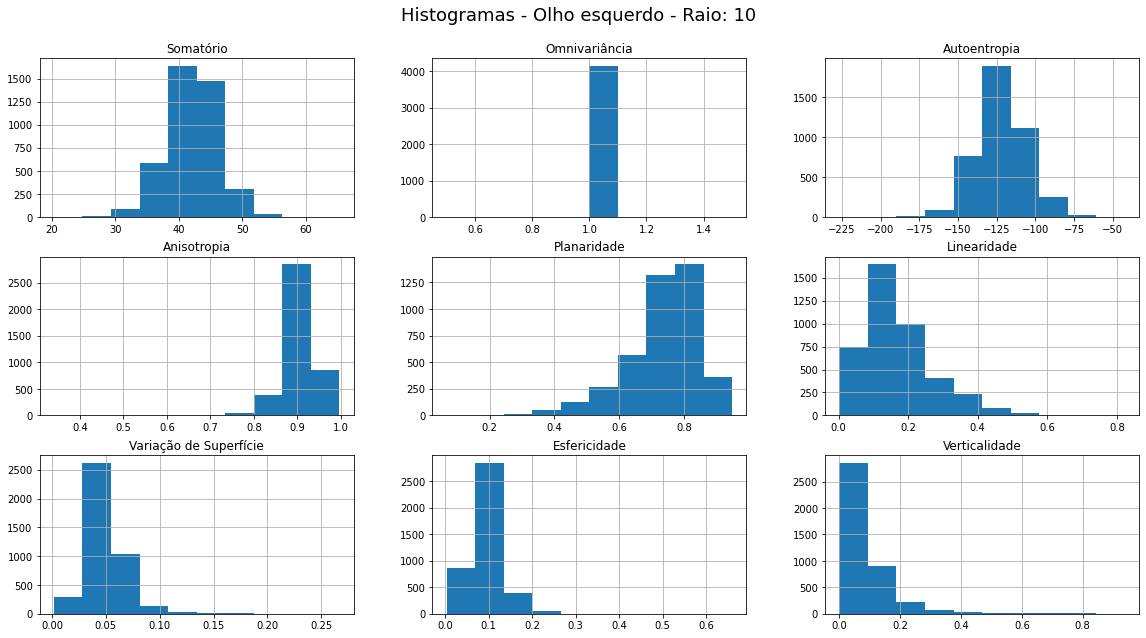

In [8]:
plot_histograms(df_le, point_name='Olho esquerdo', radius=10)

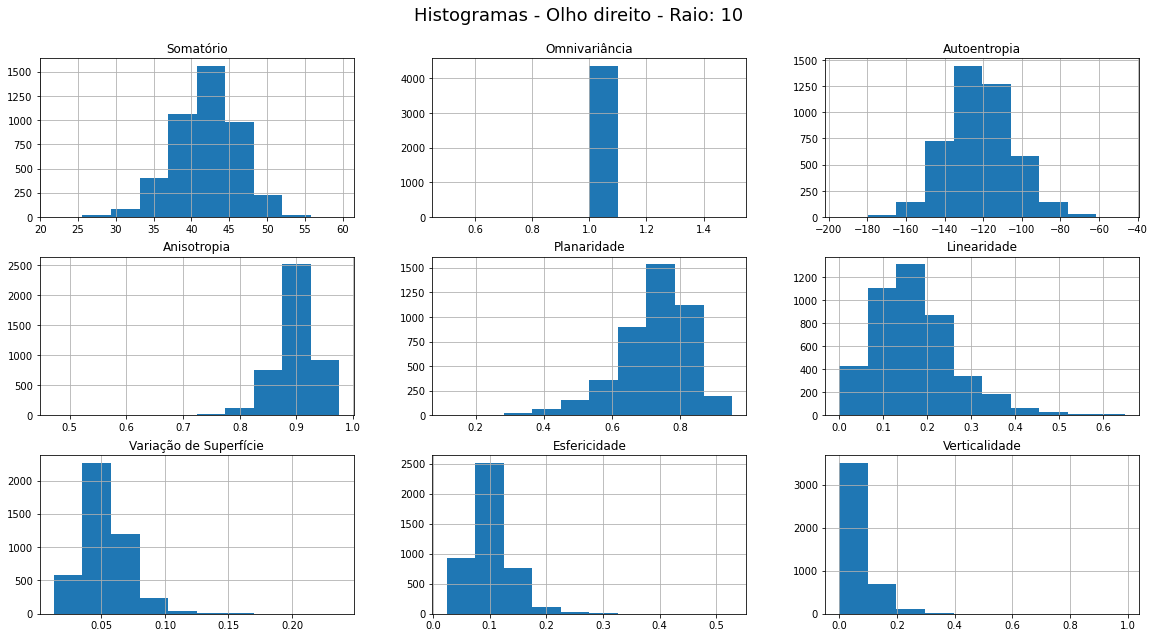

In [9]:
plot_histograms(df_re, point_name='Olho direito', radius=10)

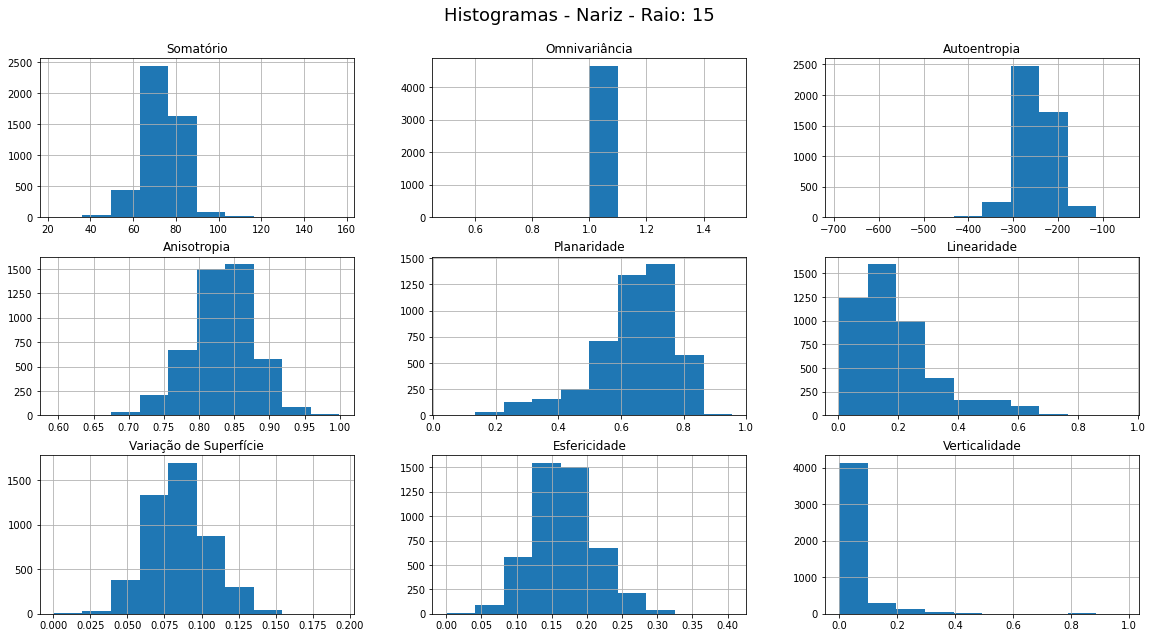

In [10]:
plot_histograms(df_nt, point_name='Nariz', radius=15)

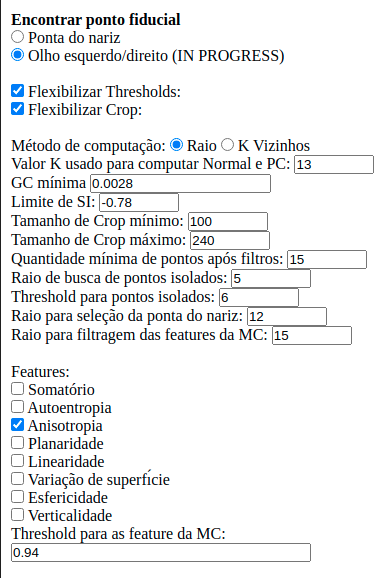

In [11]:
# plot_histograms(df_re, point_name='Olho direito')

In [12]:
# plot_histograms(df_nt, point_name='Ponta do nariz')

In [13]:
def plot_histograms_together(df, columns=columns, title=''):    
    colsNames = []
    for i in range(len(columns)):
        aux = []
        for i in np.arange(i, len(columns), len(columns)):
            aux.append(columns[i])
        colsNames.append(aux)
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
#         arr = []
        for c in col:
#             arr.append(df[c])
#             df.hist(ax=axes[i, j], column=[column], bins=10)
#         axes[i, j].hist([df['gf01_r_10'], df['gf01_r_15']], bins=10, label=labels, stacked=True)
#             df.hist(ax=axes[i, j], column=[c], bins=10)
#         axes[i, j].hist(arr, bins=10, label=labels, stacked=True)
            axes[i, j].hist(df[c], bins=10, alpha=1)

        axes[i, j].set_title(features[index])
        axes[i, j].legend(labels)
#         df[col].plot.hist(bins=20, stacked=True, ax=axes[i, j], cumulative=True)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

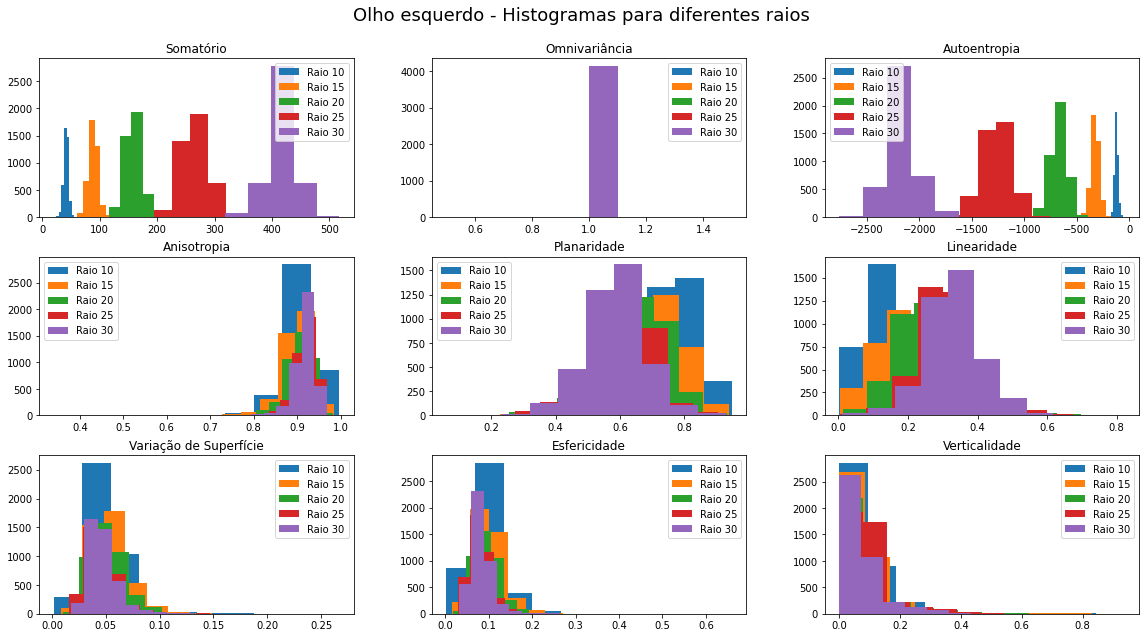

In [14]:
plot_histograms_together(df_le, title='Olho esquerdo - Histogramas para diferentes raios')

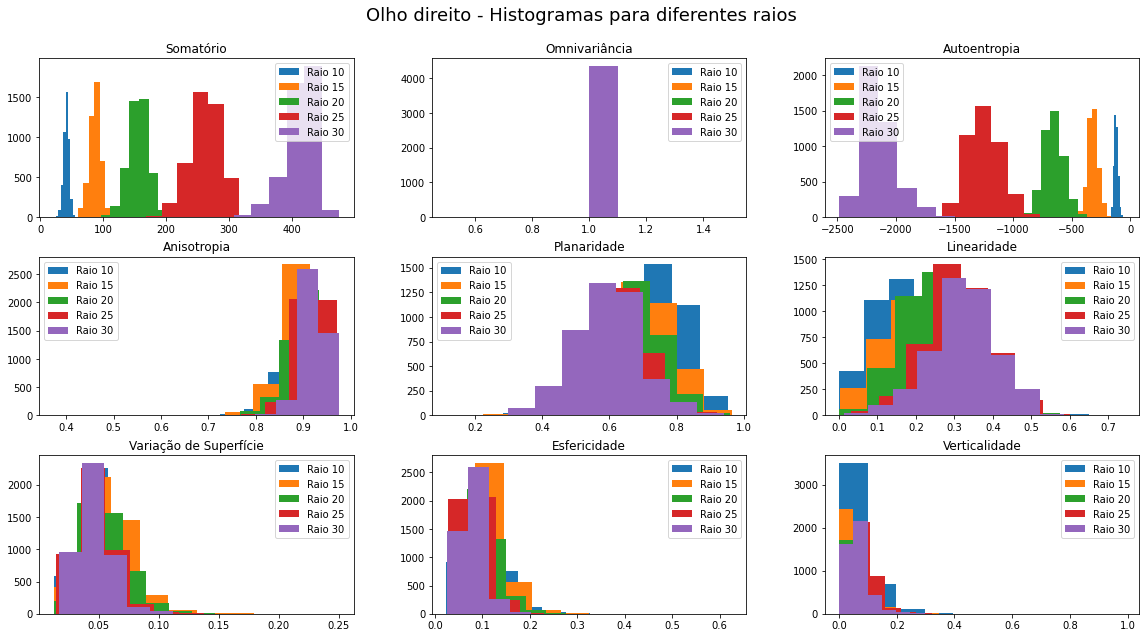

In [15]:
plot_histograms_together(df_re, title='Olho direito - Histogramas para diferentes raios')

In [16]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colsNames = []
    for i in range(nfeatures):
        aux = []
        for i in np.arange(i, len(columns), nfeatures):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    for col in colsNames[gfIndex]:
        plt.hist(df[col], bins=10, alpha=0.9)

    plt.title('Histograma: ' + features[gfIndex])
    plt.legend(labels)

    plt.show()

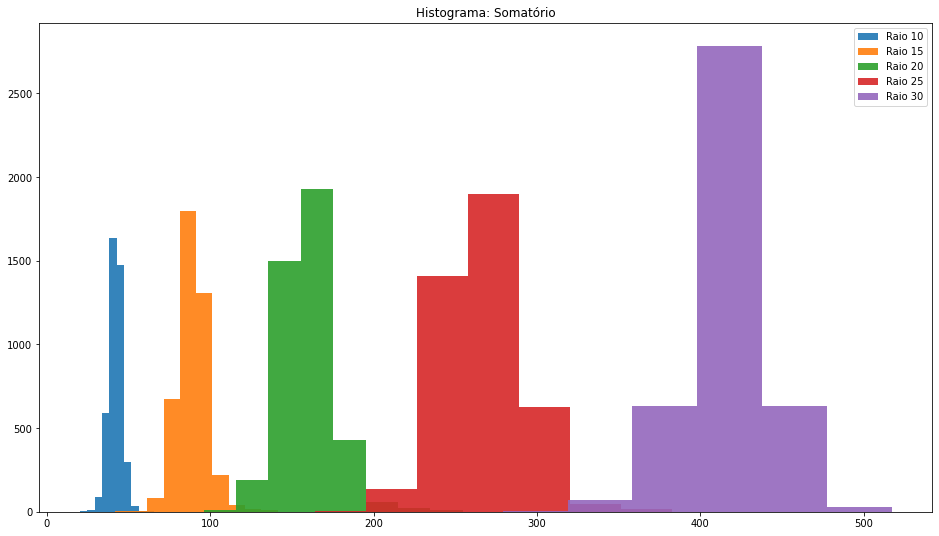

In [17]:
plot_histogram_together(df_le, 0)

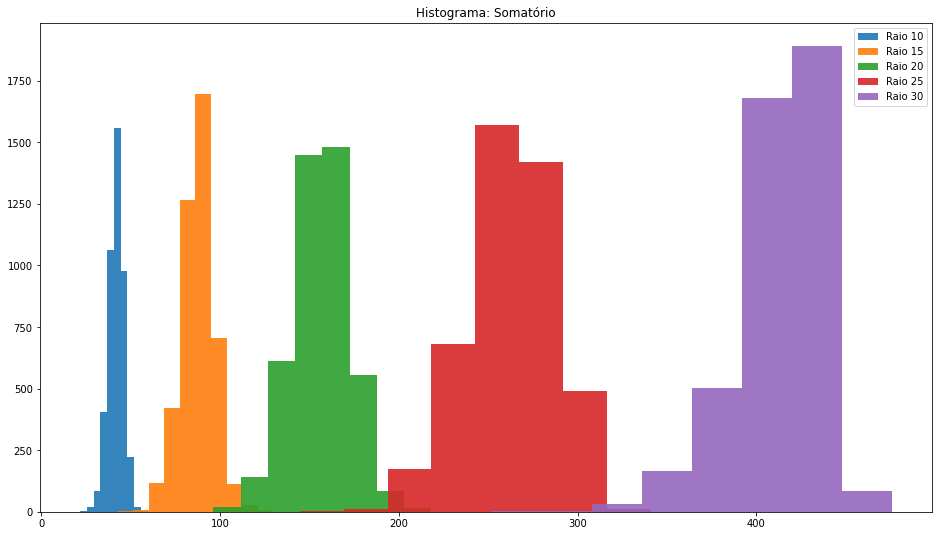

In [18]:
plot_histogram_together(df_re, 0)

In [19]:
# helper datasets

# left eye
dfr10_le = df_le.iloc[:,3:12]
dfr15_le = df_le.iloc[:,12:21]
dfr20_le = df_le.iloc[:,21:30]
dfr25_le = df_le.iloc[:,30:39]
dfr30_le = df_le.iloc[:,39:48]

# right eye
dfr10_re = df_re.iloc[:,3:12]
dfr15_re = df_re.iloc[:,12:21]
dfr20_re = df_re.iloc[:,21:30]
dfr25_re = df_re.iloc[:,30:39]
dfr30_re = df_re.iloc[:,39:48]

# rose tip
dfr10_nt = df_nt.iloc[:,3:12]
dfr15_nt = df_nt.iloc[:,12:21]
dfr20_nt = df_nt.iloc[:,21:30]
dfr25_nt = df_nt.iloc[:,30:39]
dfr30_nt = df_nt.iloc[:,39:48]

In [20]:
def plot_scatterplot(df, column, expression=None, title=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    df.columns = features
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.25, hspace=0.25)
    plt.show()

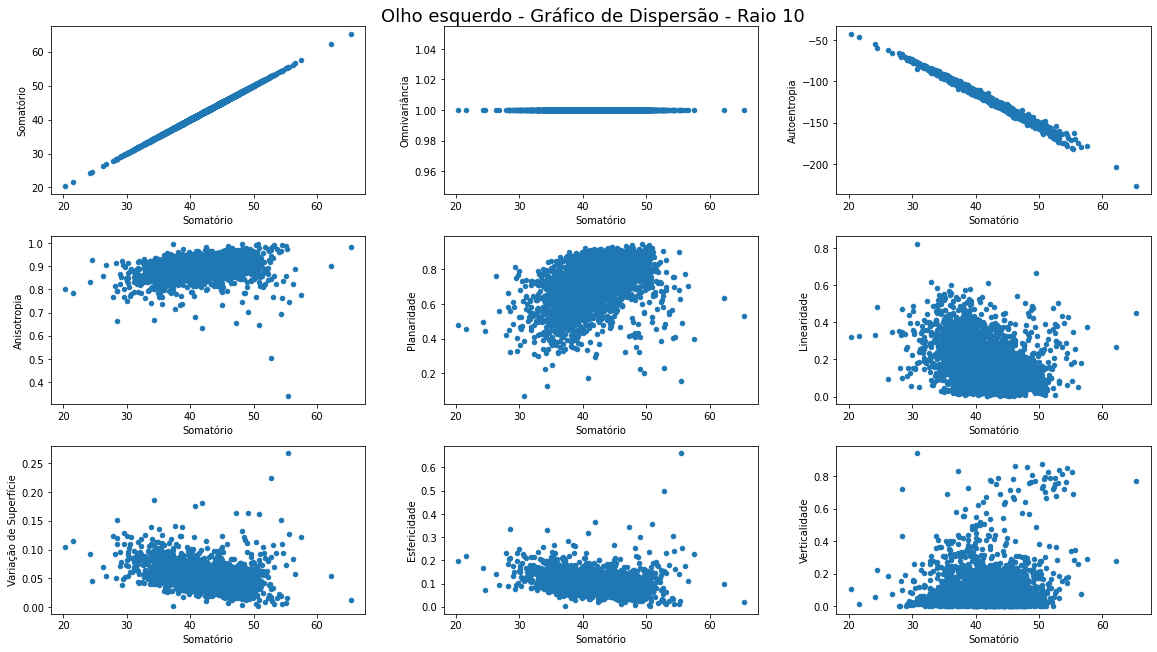

In [21]:
plot_scatterplot(dfr10_le, 'Somatório', title='Olho esquerdo - Gráfico de Dispersão - Raio 10')

In [22]:
def plot_scatterplot_together(dfl, dfr, dfn, column, expression=None, title=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    dfl.columns = dfr.columns = dfn.columns = features
    
#     if expression is not None:
#         df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(dfl.columns):
        dfl.plot.scatter(ax=axes[i, j], x=column, y=col, c='r', label='Olho esquerdo')
        dfr.plot.scatter(ax=axes[i, j], x=column, y=col, c='g', label='Olho direito')
        dfn.plot.scatter(ax=axes[i, j], x=column, y=col, c='b', label='Nariz')
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.25, hspace=0.25)
    plt.show()

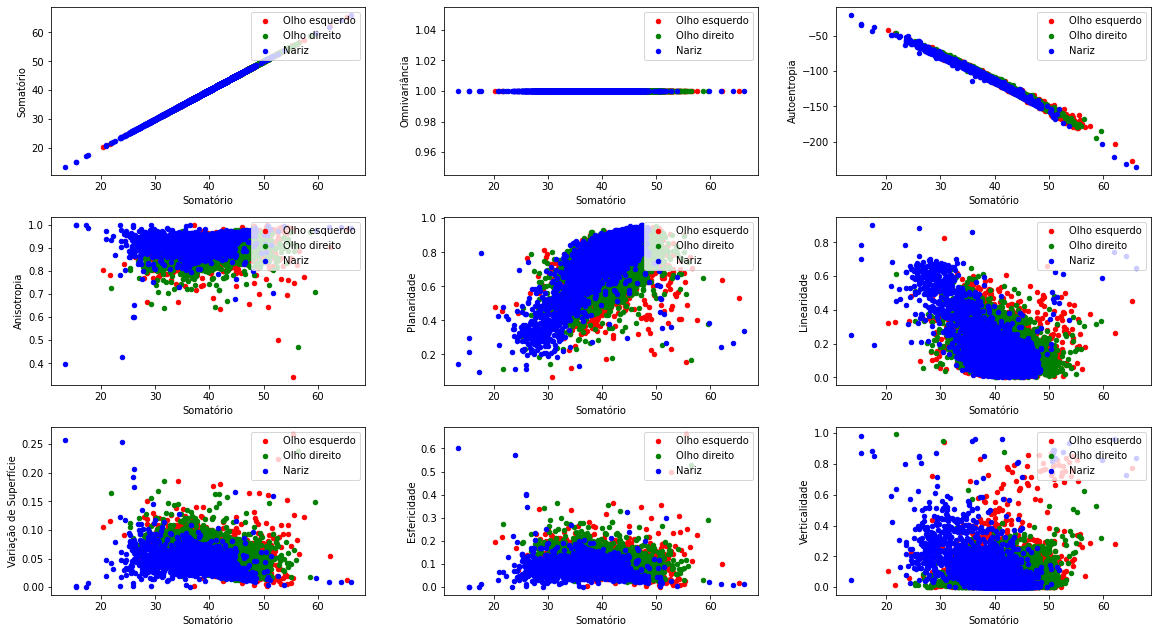

In [23]:
plot_scatterplot_together(dfr10_le, dfr10_re, dfr10_nt, 'Somatório')

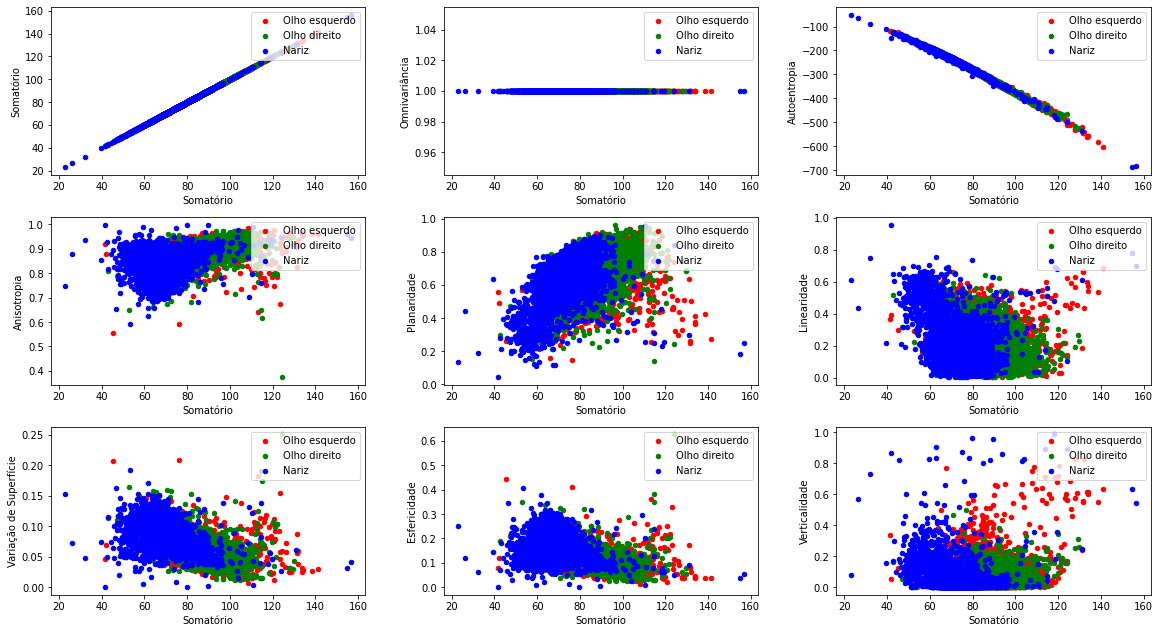

In [24]:
plot_scatterplot_together(dfr15_le, dfr15_re, dfr15_nt, 'Somatório')

In [25]:
# https://stackoverflow.com/questions/45079601/how-can-i-get-gini-coefficient-in-sklearn
def gini(data):
    x = np.array(data, dtype=np.float32)
    n = len(data)
    diffs = sum(abs(i - j) for i, j in combinations(x, r=2))

    return diffs / (2 * n**2 * data.mean())

def calculate_gini_from_histogram(df, column):
    hist, _ = np.histogram(df[column].dropna().values, bins=10)

    return gini(hist)

def calculate_ginis(df):
    colsNames = []
    for i in range(nfeatures):
        aux = []
        for i in np.arange(i, len(columns), nfeatures):
            aux.append(columns[i])
        colsNames.append(aux)

    data = []
    for i, column in enumerate(colsNames):
        ginis = []
        for j, col in enumerate(column):
            ginis.append(calculate_gini_from_histogram(df, col))
        data.append(ginis)

    return data

In [26]:
radius = pd.DataFrame(data={'Raio': [label.split(' ')[-1] for label in labels]})

def create_gini_table(df):
    data = calculate_ginis(df)
    return pd.concat([radius, pd.DataFrame(np.transpose(data), columns=features)], axis=1)

In [27]:
df_gini_le = create_gini_table(df_le)
df_gini_le

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.348215,0.45,0.353521,0.406199,0.311553,0.322672,0.395128,0.406199,0.399083
1,15,0.352098,0.45,0.354342,0.371394,0.280391,0.266233,0.361577,0.371394,0.394597
2,20,0.368234,0.45,0.365943,0.333647,0.283285,0.283430,0.332176,0.333647,0.379209
3,25,0.367583,0.45,0.356199,0.352388,0.305258,0.314954,0.329378,0.352388,0.373107
4,30,0.395755,0.45,0.393439,0.375350,0.327135,0.328751,0.341727,0.375350,0.392354


In [28]:
df_gini_re = create_gini_table(df_re)
df_gini_re

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.315505,0.45,0.309702,0.381743,0.307867,0.284014,0.372339,0.381743,0.425573
1,15,0.329656,0.45,0.323005,0.394472,0.289312,0.258394,0.370183,0.394472,0.381835
2,20,0.322294,0.45,0.316720,0.368830,0.290734,0.297271,0.347569,0.368830,0.363486
3,25,0.332729,0.45,0.328394,0.390436,0.291422,0.305482,0.370780,0.390436,0.367867
4,30,0.364725,0.45,0.362959,0.401468,0.298853,0.281422,0.374839,0.401468,0.379243


In [29]:
df_gini_nt = create_gini_table(df_nt)
df_gini_nt

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.376255,0.45,0.376641,0.414157,0.307100,0.336808,0.402617,0.414157,0.411390
1,15,0.384170,0.45,0.387387,0.315959,0.289961,0.309331,0.323874,0.315959,0.429193
2,20,0.376963,0.45,0.387066,0.286079,0.256113,0.222716,0.299228,0.286079,0.435628
3,25,0.350086,0.45,0.349142,0.247426,0.292299,0.228185,0.267568,0.247426,0.432068
4,30,0.363085,0.45,0.358280,0.278979,0.336937,0.307422,0.270506,0.278979,0.414178


In [30]:
def correlation_matrix(df, radius):
    df.columns = features
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, cmap=sns.cm.rocket_r)
    plt.title(f'Matriz de correlação - Raio {radius}', fontsize=18)
    plt.show()

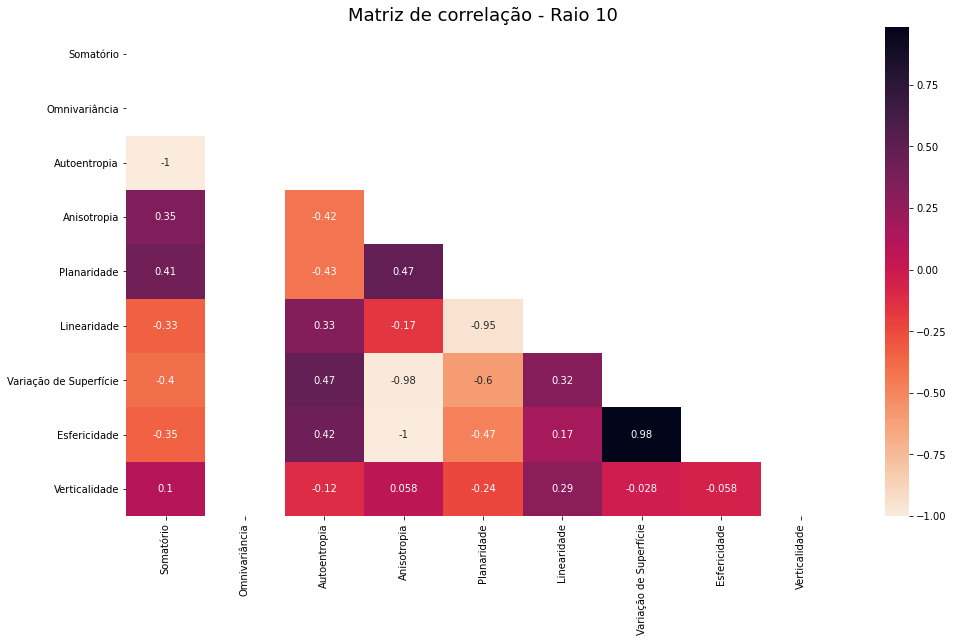

In [32]:
correlation_matrix(dfr10_le, radius=10)

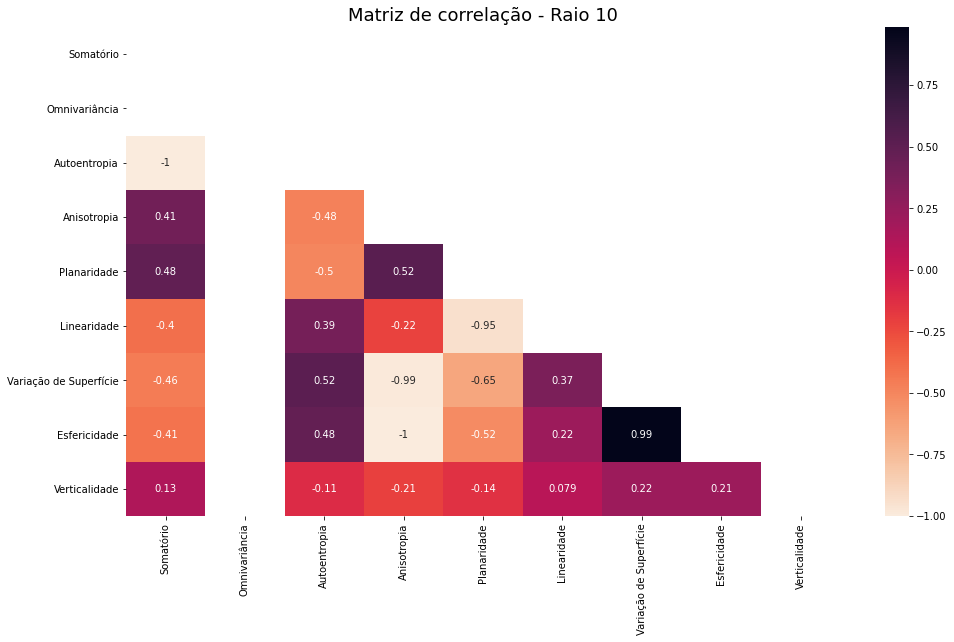

In [33]:
correlation_matrix(dfr10_re, radius=10)

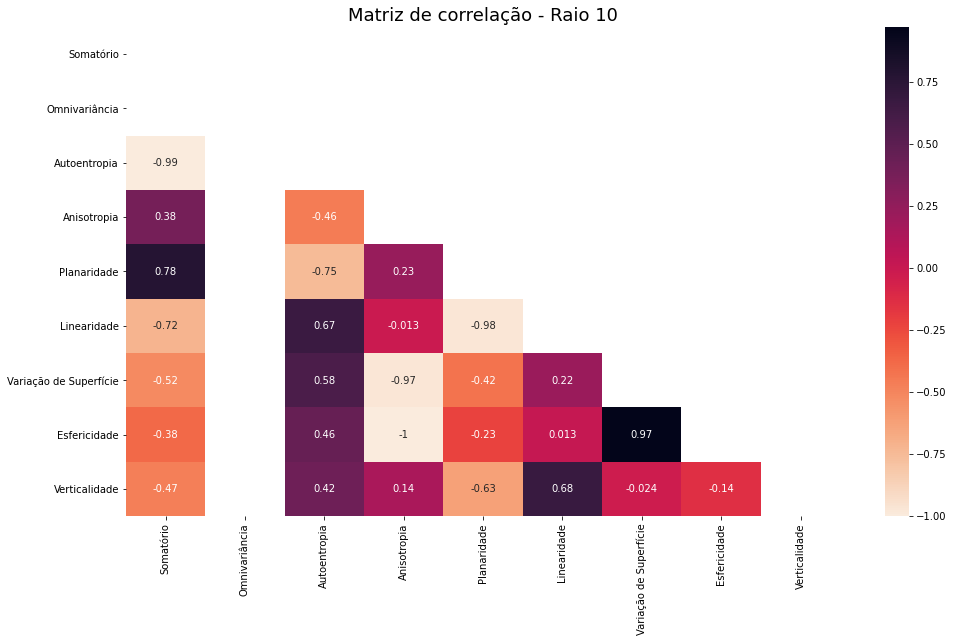

In [34]:
correlation_matrix(dfr10_nt, radius=10)